## `Building a regression model using regularisation in order to predict the actual` <br><br> `value of prospective properties and decide whether to invest in them or not.`

### Importing and Understanding Data

In [1]:
# Suppress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
pd.options.mode.chained_assignment = None
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
# Identifying the encoding of the csv file to be used for this assignment

with open(r'C:\upGrad\Course 3\Advanced_Regression_Assignment\train.csv') as f:
    print(f)

<_io.TextIOWrapper name='C:\\upGrad\\Course 3\\Advanced_Regression_Assignment\\train.csv' mode='r' encoding='cp1252'>


In [4]:
# Importing housing.csv

path = r'C:\upGrad\Course 3\Advanced_Regression_Assignment'
housing = pd.read_csv(path + '\\train.csv')

In [5]:
# Looking at the first five rows

housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Checking for Duplicate IDs

In [6]:
# Making sure that number of duplicate rows are zero

sum(housing.duplicated(subset = "Id")) == 0

True

#### Primary Checks

In [7]:
# Determining the number of rows and columns in the dataframe

housing.shape

(1460, 81)

In [8]:
# Checking the information of the entire dataframe

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
# Describing the statistical parameters of the dataframe

housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Viewing the columns in the dataframe

housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
# Checking for null values (column-wise) in the dataframe

housing.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [12]:
# Checking for percentage of null values (column-wise) in the dataframe

housing.isnull().sum() * 100 / len(housing)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
B

<font color = purple> *As you can see, there are several variables that appear to have missing values in the data. However, based on the data description document provided, there are several variables with `NA` as a value. I will impute these with an appropriate value.* </font>

### Data Cleaning
- #### Imputing appropriate value for variables with `NA` as a value.

In [13]:
# Creating a list of aforementioned variables

na_vars = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 
           'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

In [14]:
# Replacing NA with appropriate value

for i in na_vars:
    housing.loc[pd.isnull(housing[i]), [i]] = 'N/A'

In [15]:
# Confirming imputation 

for i in na_vars:
    print(housing[i].value_counts().to_frame(), end='\n\n')

      Alley
N/A    1369
Grvl     50
Pave     41

     BsmtQual
TA        649
Gd        618
Ex        121
N/A        37
Fa         35

     BsmtCond
TA       1311
Gd         65
Fa         45
N/A        37
Po          2

     BsmtExposure
No            953
Av            221
Gd            134
Mn            114
N/A            38

     BsmtFinType1
Unf           430
GLQ           418
ALQ           220
BLQ           148
Rec           133
LwQ            74
N/A            37

     BsmtFinType2
Unf          1256
Rec            54
LwQ            46
N/A            38
BLQ            33
ALQ            19
GLQ            14

     FireplaceQu
N/A          690
Gd           380
TA           313
Fa            33
Ex            24
Po            20

         GarageType
Attchd          870
Detchd          387
BuiltIn          88
N/A              81
Basment          19
CarPort           9
2Types            6

     GarageFinish
Unf           605
RFn           422
Fin           352
N/A            81

     Garag

<font color = purple> *As you can see, there are a few variables that appear to have skewed data, i.e. one value having a much larger distribution relative to the rest. I don't think these features will be of any value as predictor variables and will go ahead and remove them.* </font>

In [16]:
# Removing the aforementioned variables with skewed data. 

housing.drop(['Alley', 'BsmtCond', 'BsmtFinType2', 'GarageQual', 'GarageCond', 
              'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,N/A,Attchd,2003.0,RFn,2,548,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
# Checking percentage of missing values after removing the columns above

round(housing.isnull().sum() * 100 / len(housing), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          0.00
BsmtExposure      0.00
BsmtFinType1      0.00
BsmtFinSF1        0.00
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF          0.00
2ndFlrSF          0.00
LowQualFinSF      0.00
GrLivArea  

In [18]:
# Removing 'MasVnrType' rows with null values

housing = housing[~pd.isnull(housing['MasVnrType'])]

In [19]:
# Removing 'MasVnrArea' rows with null values

housing = housing[~pd.isnull(housing['MasVnrArea'])]

In [20]:
# Removing 'Electrical' rows with null values

housing = housing[~pd.isnull(housing['Electrical'])]

<font color = purple> *I will re-visit handling of missing values for `LotFrontage` and `GarageYrBlt` later.* </font>

### Visualizing Numeric Variables

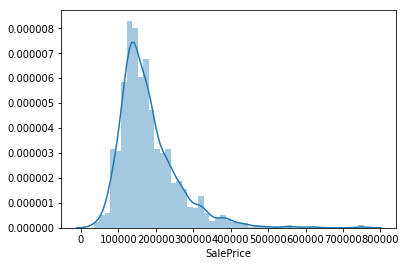

In [21]:
# Visualizing target variable (SalePrice) distribution

sns.distplot(housing.SalePrice)
plt.show()

In [22]:
# Checking for skewness of data for SalePrice

housing['SalePrice'].skew()

1.8831110462405252

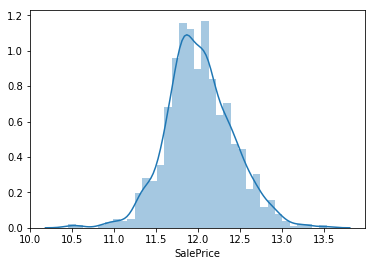

In [23]:
# Checking distribution of SalePrice with log transformation

sns.distplot(np.log(housing.SalePrice))
plt.show()

In [24]:
# Checking correlation for the numerical features excluding several that would not be considered continuous variables

housing.drop(['Id', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 
              'GarageYrBlt', 'YrSold'], axis=1).corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
LotFrontage,1,0.43,0.25,-0.059,0.19,0.24,0.05,0.13,0.39,0.46,0.081,0.039,0.4,0.1,-0.007,0.2,0.054,0.26,-0.0059,0.35,0.27,0.28,0.34,0.087,0.15,0.011,0.07,0.042,0.21,0.0035,0.011,0.35
LotArea,0.43,1,0.11,-0.0023,0.1,0.21,0.11,-0.0042,0.26,0.3,0.053,0.0049,0.26,0.16,0.048,0.12,0.016,0.12,-0.025,0.19,0.27,0.15,0.18,0.17,0.086,-0.023,0.021,0.043,0.078,0.038,0.0032,0.26
OverallQual,0.25,0.11,1,-0.091,0.41,0.24,-0.058,0.31,0.54,0.48,0.3,-0.03,0.59,0.11,-0.039,0.55,0.27,0.11,-0.18,0.43,0.4,0.6,0.56,0.24,0.3,-0.11,0.031,0.066,0.066,-0.031,0.069,0.79
OverallCond,-0.059,-0.0023,-0.091,1,-0.13,-0.042,0.039,-0.14,-0.17,-0.14,0.028,0.025,-0.077,-0.052,0.12,-0.19,-0.061,0.014,-0.081,-0.056,-0.02,-0.18,-0.15,-0.0045,-0.031,0.075,0.025,0.054,-0.0023,0.069,-0.0042,-0.076
MasVnrArea,0.19,0.1,0.41,-0.13,1,0.26,-0.072,0.11,0.36,0.34,0.17,-0.069,0.39,0.085,0.027,0.28,0.2,0.1,-0.038,0.28,0.25,0.36,0.37,0.16,0.13,-0.11,0.019,0.061,0.012,-0.03,-0.0062,0.48
BsmtFinSF1,0.24,0.21,0.24,-0.042,0.26,1,-0.049,-0.5,0.52,0.44,-0.14,-0.064,0.21,0.65,0.068,0.056,0.0028,-0.11,-0.087,0.044,0.26,0.22,0.3,0.21,0.11,-0.11,0.027,0.063,0.14,0.0039,-0.016,0.38
BsmtFinSF2,0.05,0.11,-0.058,0.039,-0.072,-0.049,1,-0.21,0.11,0.099,-0.099,0.015,-0.009,0.16,0.071,-0.075,-0.031,-0.016,-0.041,-0.035,0.047,-0.037,-0.018,0.068,0.0042,0.037,-0.03,0.088,0.042,0.0048,-0.015,-0.01
BsmtUnfSF,0.13,-0.0042,0.31,-0.14,0.11,-0.5,-0.21,1,0.42,0.32,0.0063,0.028,0.24,-0.42,-0.096,0.29,-0.039,0.17,0.029,0.25,0.053,0.21,0.18,-0.0042,0.13,-0.0038,0.021,-0.013,-0.035,-0.024,0.033,0.22
TotalBsmtSF,0.39,0.26,0.54,-0.17,0.36,0.52,0.11,0.42,1,0.82,-0.17,-0.033,0.45,0.31,0.0003,0.32,-0.048,0.052,-0.076,0.29,0.34,0.43,0.49,0.23,0.24,-0.1,0.038,0.086,0.13,-0.018,0.011,0.61
1stFlrSF,0.46,0.3,0.48,-0.14,0.34,0.44,0.099,0.32,0.82,1,-0.2,-0.014,0.57,0.24,0.0026,0.38,-0.12,0.13,0.059,0.41,0.41,0.44,0.49,0.24,0.21,-0.073,0.057,0.09,0.13,-0.021,0.031,0.61


In [25]:
# Retrieving frequency distribution for the unique values of the numerical variables

for i in housing.drop(['Id', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 
                       'GarageYrBlt', 'YrSold'], axis=1).select_dtypes(exclude=['object']).columns:
    print(housing[i].value_counts().to_frame(), end='\n')

       LotFrontage
60.0           143
70.0            70
80.0            69
50.0            57
75.0            52
65.0            43
85.0            40
78.0            25
21.0            23
90.0            23
68.0            19
24.0            19
64.0            19
72.0            17
79.0            17
63.0            17
73.0            17
55.0            17
100.0           16
51.0            15
66.0            15
74.0            15
52.0            14
59.0            13
71.0            12
43.0            12
57.0            12
82.0            12
40.0            12
67.0            11
69.0            11
76.0            11
86.0            10
92.0            10
88.0            10
34.0            10
53.0            10
77.0             9
44.0             9
62.0             9
84.0             9
35.0             8
61.0             8
98.0             8
93.0             8
96.0             8
58.0             7
120.0            7
30.0             6
41.0             6
...            ...
36.0        

### Data Preparation
- #### Numerical Variables

In [26]:
# Removing numerical variables where the records are skewed in favor of one value over the rest.
# Removing 'BedroomAbvGr', 'OverallCond' and 'MoSold' since none of them have practically any correlation with 'SalePrice'.
# Also removing 'Id'.
# I don't think these features will be of any value as predictor variables. 

housing.drop(['Id', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 
              'ScreenPorch', 'PoolArea', 'MiscVal', 'BedroomAbvGr', 'OverallCond', 'MoSold'], axis=1, inplace=True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,Gd,8,Typ,0,N/A,Attchd,2003.0,RFn,2,548,Y,0,61,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,Y,298,0,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,Y,0,42,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,Y,0,35,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,Y,192,84,2008,WD,Normal,250000


In [27]:
# Applying log transformation to the target (SalePrice) variable

housing.SalePrice = np.log(housing.SalePrice)

In [28]:
# Confirming log transformation

housing.SalePrice.describe()

count    1451.000000
mean       12.022388
std         0.399502
min        10.460242
25%        11.774520
50%        11.998433
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

### Visualising Categorical Variables

In [29]:
# Creating a list of categorical variables from the housing dataframe

cat_vars = list(housing.select_dtypes(include=['object']).columns)

cat_vars.extend(['MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'])

print(cat_vars)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition', 'MSSubClass', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


In [30]:
# Retrieving frequency distribution for the categorical variables' unique values

for i in cat_vars:
    print(housing[i].value_counts().to_frame(), end='\n\n')

         MSZoning
RL           1145
RM            218
FV             62
RH             16
C (all)        10

      Street
Pave    1445
Grvl       6

     LotShape
Reg       918
IR1       482
IR2        41
IR3        10

     LandContour
Lvl         1302
Bnk           63
HLS           50
Low           36

        Utilities
AllPub       1450
NoSeWa          1

         LotConfig
Inside        1045
Corner         262
CulDSac         93
FR2             47
FR3              4

     LandSlope
Gtl       1373
Mod         65
Sev         13

         Neighborhood
NAmes             225
CollgCr           149
OldTown           113
Edwards           100
Somerst            83
Gilbert            78
NridgHt            76
Sawyer             74
NWAmes             73
SawyerW            58
BrkSide            58
Crawfor            50
Mitchel            49
NoRidge            41
Timber             37
IDOTRR             37
ClearCr            28
StoneBr            25
SWISU              25
MeadowV            17
B

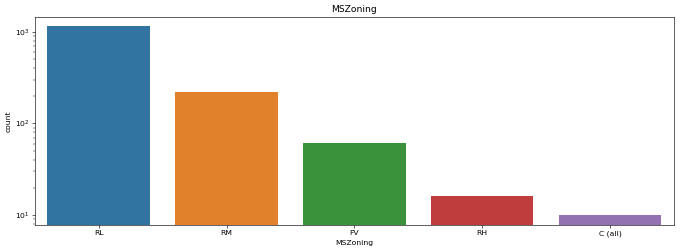

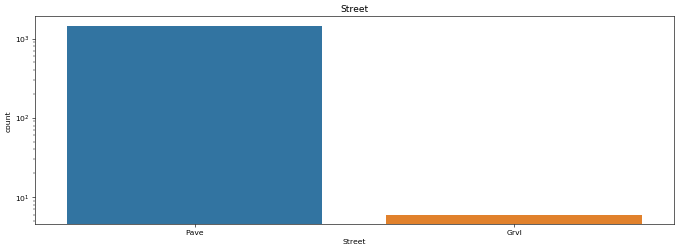

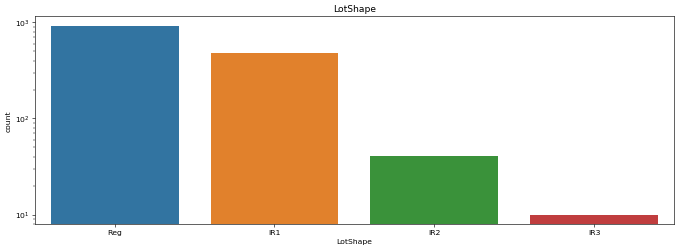

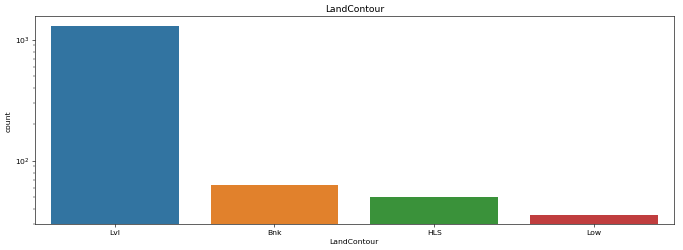

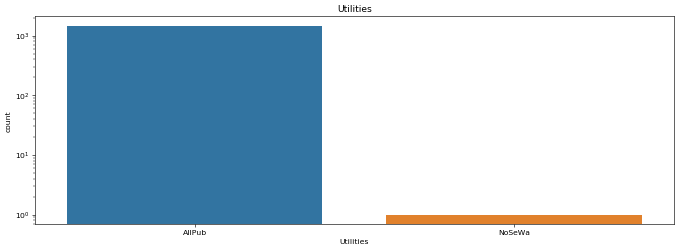

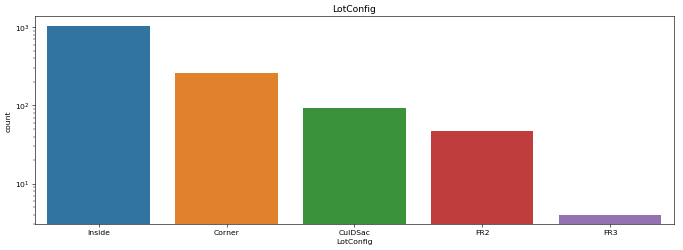

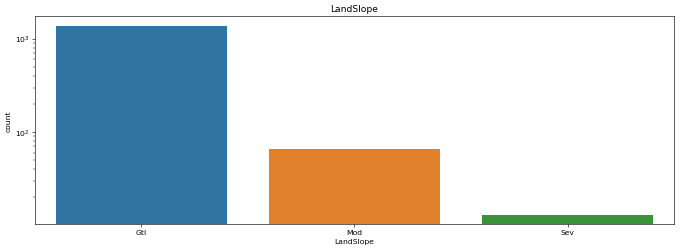

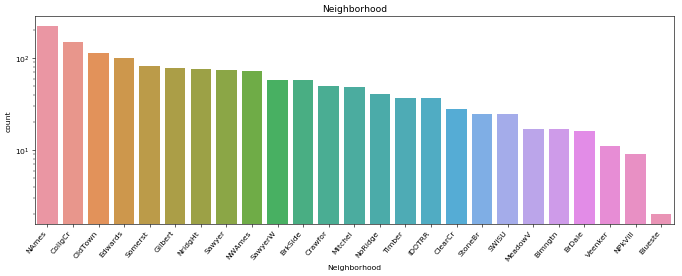

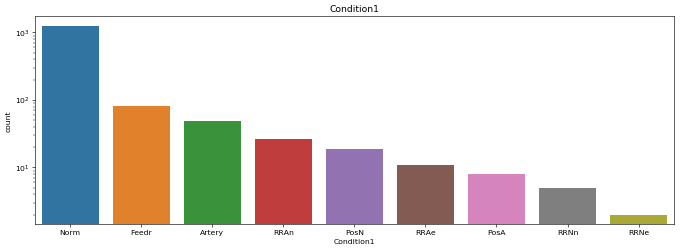

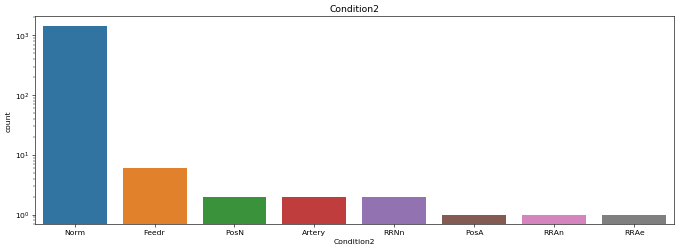

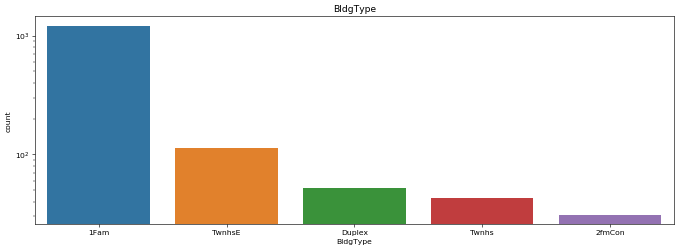

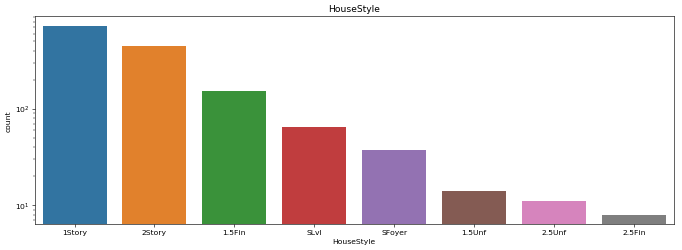

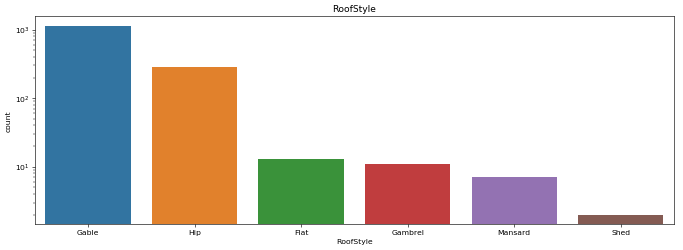

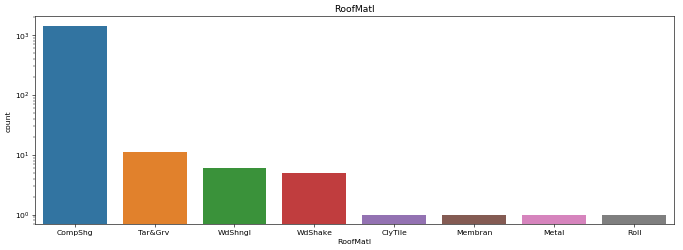

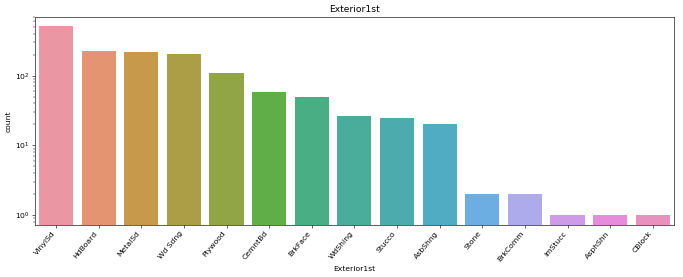

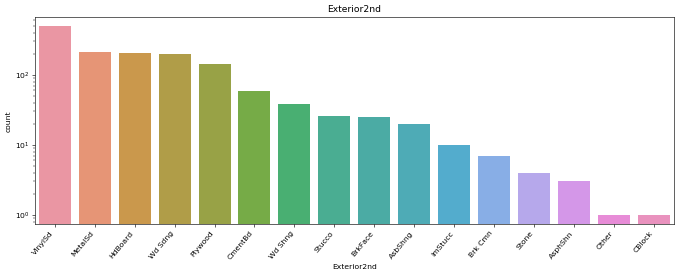

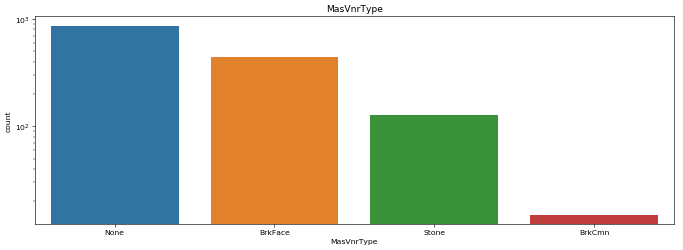

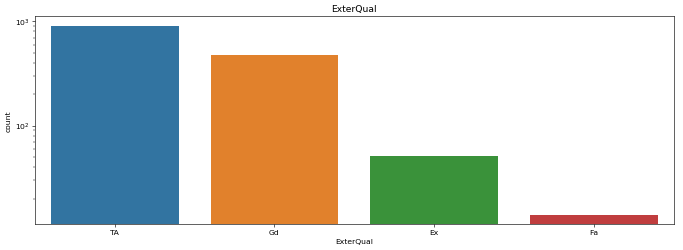

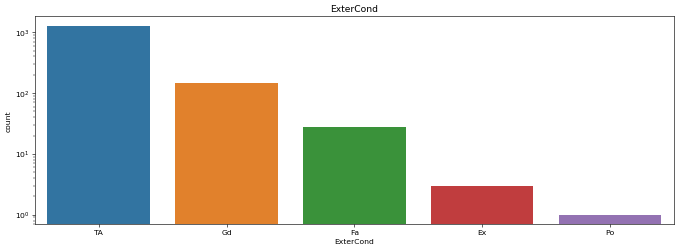

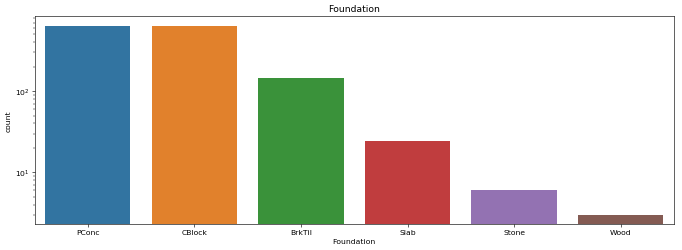

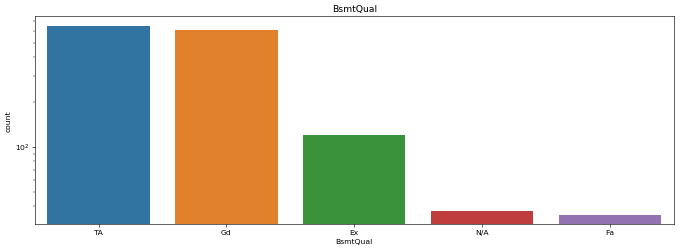

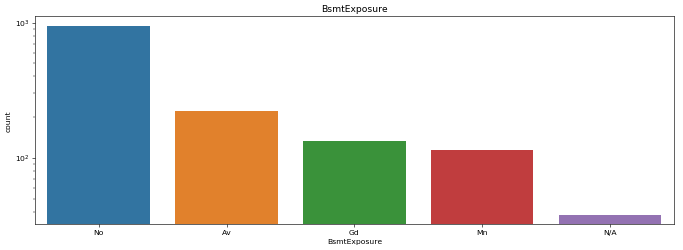

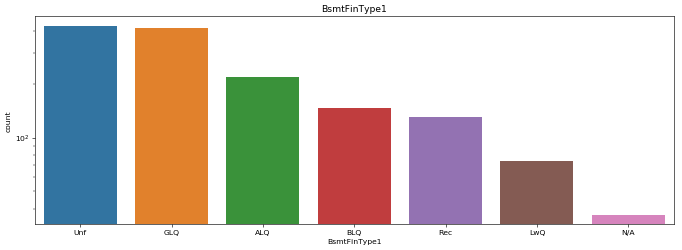

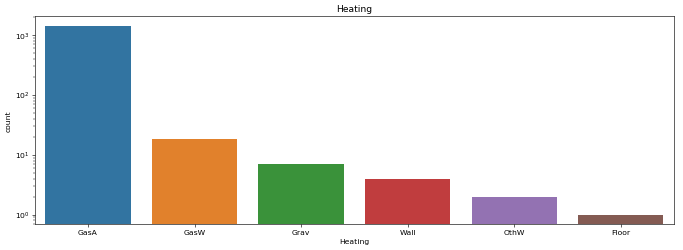

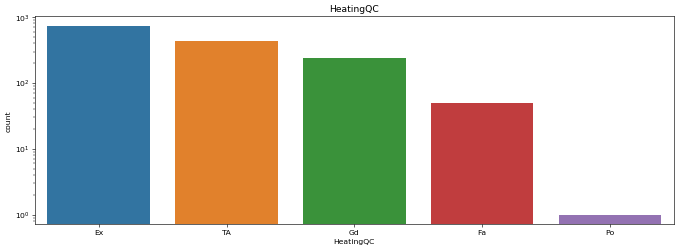

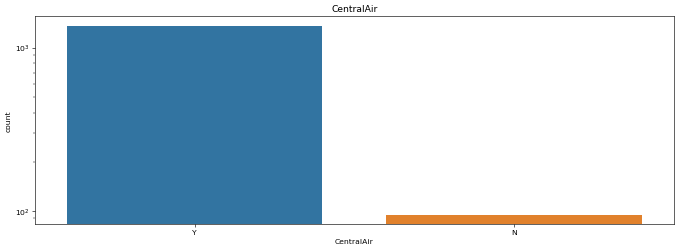

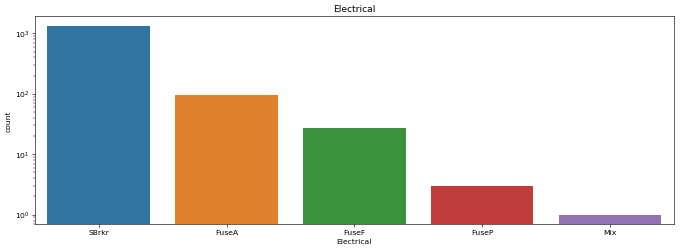

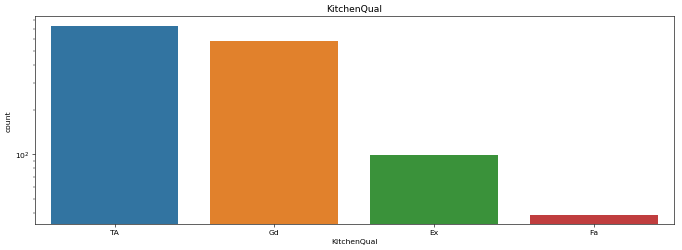

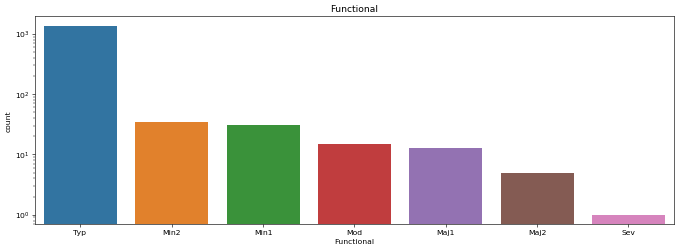

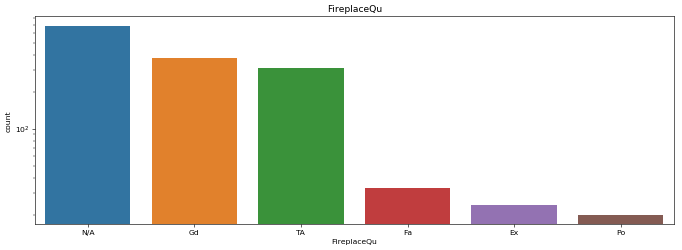

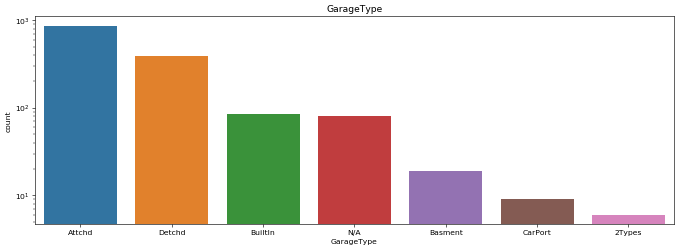

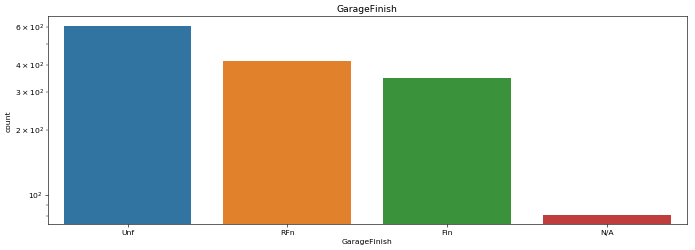

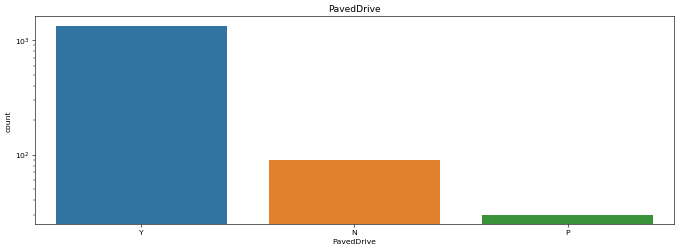

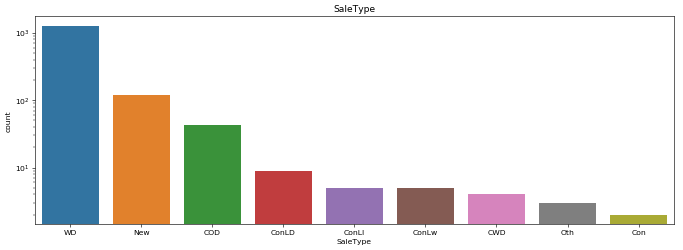

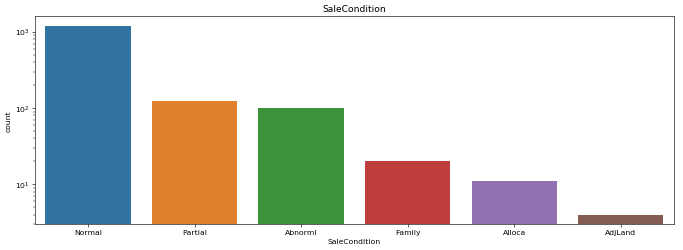

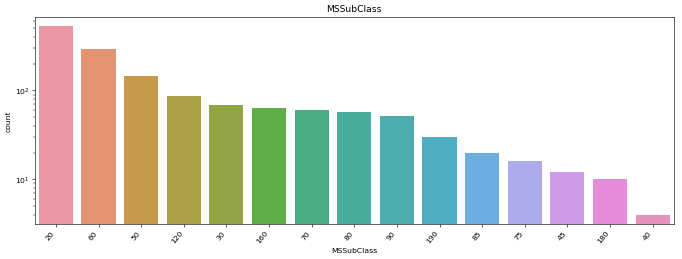

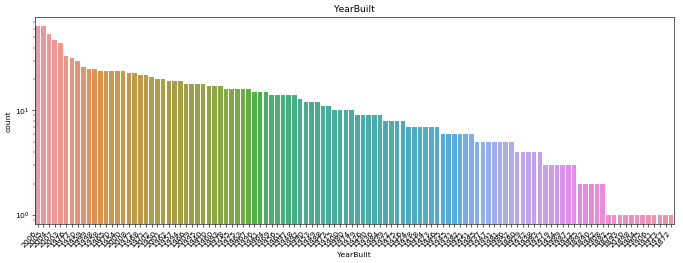

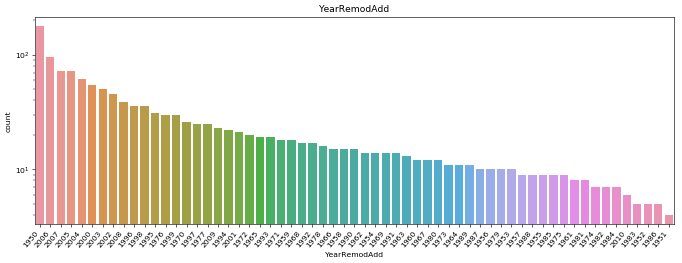

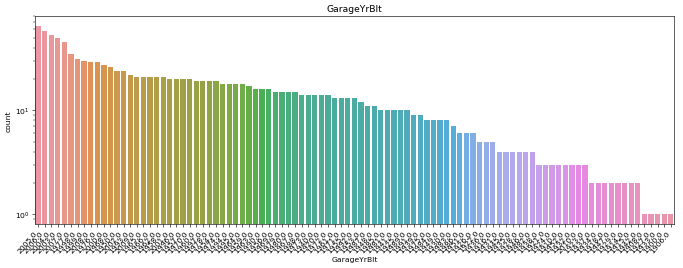

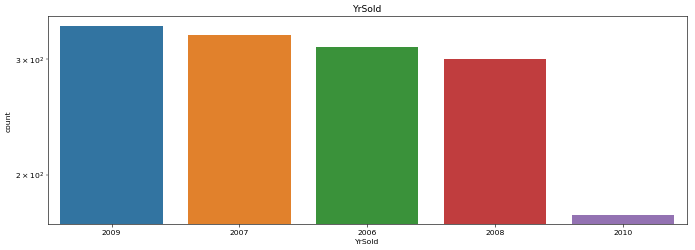

In [31]:
# Univariate analysis of categorical variables

for i in cat_vars:
    
    # set figure size for larger figure
    plt.figure(num=None, figsize=(15, 5), dpi=55, facecolor='w', edgecolor='k')

    # count plot
    ax = sns.countplot(x=housing[i], data=housing, order=housing[i].value_counts().index)

    if len(housing[i].unique()) > 9:
        
        # rotate and align the tick labels to look better
        ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha='right')

    # changing to a logarithmic scale so that the range can fit into the size of the plot.
    plt.yscale('log')

    # set title
    ax.set_title(i)
    
    # show plot
    plt.show()

### Data Preparation
- #### Categorical Variables

In [32]:
# Removing categorical variables where the records are skewed in favor of one value over the rest.
# I don't think these features will be of any value as predictor variables. 

housing.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 
              'Functional', 'PavedDrive', 'SaleType', 'SaleCondition'], axis=1, inplace=True)
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,Gd,8,0,N/A,Attchd,2003.0,RFn,2,548,0,61,2008,12.247694
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,2007,12.109011
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,2008,12.317167
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,2006,11.849398
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,2008,12.429216


#### Derived Variables

In [33]:
# Reviewing the number of records with missing values for the 'GarageYrBlt' feature

housing.GarageYrBlt.isnull().sum()

81

In [34]:
# Reviewing the housing dataframe for records where the 'GarageYrBlt' feature has missing values

housing[housing.GarageYrBlt.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice
39,90,RL,65.0,6040,Reg,Lvl,Inside,Gtl,Edwards,Norm,Duplex,1Story,4,1955,1955,Gable,AsbShng,Plywood,None,0.0,TA,TA,PConc,N/A,N/A,N/A,0,0,0,TA,1152,0,1152,0,2,0,Fa,6,0,N/A,N/A,NaN,N/A,0,0,0,0,2008,11.314475
48,190,RM,33.0,4456,Reg,Lvl,Inside,Gtl,OldTown,Norm,2fmCon,2Story,4,1920,2008,Gable,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,No,Unf,0,736,736,Gd,736,716,1452,0,2,0,TA,8,0,N/A,N/A,NaN,N/A,0,0,0,0,2009,11.635143
78,90,RL,72.0,10778,Reg,Lvl,Inside,Gtl,Sawyer,Norm,Duplex,1Story,4,1968,1968,Hip,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,No,Unf,0,1768,1768,TA,1768,0,1768,0,2,0,TA,8,0,N/A,N/A,NaN,N/A,0,0,0,0,2010,11.824080
88,50,C (all),105.0,8470,IR1,Lvl,Corner,Gtl,IDOTRR,Feedr,1Fam,1.5Fin,3,1915,1982,Hip,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,No,Unf,0,1013,1013,TA,1013,0,1526,0,1,0,Fa,6,0,N/A,N/A,NaN,N/A,0,0,0,0,2009,11.350407
89,20,RL,60.0,8070,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,1Story,4,1994,1995,Gable,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,No,GLQ,588,402,990,Ex,990,0,990,1,1,0,TA,5,0,N/A,N/A,NaN,N/A,0,0,0,0,2007,11.724806
99,20,RL,77.0,9320,IR1,Lvl,Inside,Gtl,NAmes,Norm,1Fam,1Story,4,1959,1959,Gable,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,No,ALQ,569,381,950,Fa,1225,0,1225,1,1,1,TA,6,0,N/A,N/A,NaN,N/A,0,0,352,0,2010,11.767180
108,50,RM,85.0,8500,Reg,Lvl,Corner,Gtl,IDOTRR,Artery,1Fam,1.5Fin,5,1919,2005,Gable,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,No,Unf,0,793,793,TA,997,520,1517,0,2,0,Fa,7,0,N/A,N/A,NaN,N/A,0,0,0,0,2007,11.652687
125,190,RM,60.0,6780,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,2fmCon,1.5Fin,6,1935,1982,Gable,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,Av,GLQ,490,30,520,Gd,520,0,754,1,1,0,TA,5,0,N/A,N/A,NaN,N/A,0,0,53,0,2006,11.344507
127,45,RM,55.0,4388,IR1,Bnk,Inside,Gtl,OldTown,Feedr,1Fam,1.5Unf,5,1930,1950,Gable,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,No,LwQ,116,556,672,Ex,840,0,840,0,1,0,TA,5,1,TA,N/A,NaN,N/A,0,0,0,0,2007,11.373663
140,20,RL,70.0,10500,Reg,Lvl,FR2,Gtl,NAmes,Norm,1Fam,1Story,4,1971,1971,Gable,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,No,ALQ,432,432,864,TA,864,0,864,0,1,0,TA,5,1,Po,N/A,NaN,N/A,0,0,0,0,2010,11.652687


<font color = purple> *It's clear that `GarageYrBlt` is missing values for houses with no garage. I will impute these with an appropriate value below.* </font>

In [35]:
# Replacing the null values in 'GarageYrBlt' with the current year 
# which will subsequently allow me to create a derived variable for analysis later on.

housing.loc[pd.isnull(housing['GarageYrBlt']), ['GarageYrBlt']] = date.today().year

In [36]:
# Creating new columns from 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt'

housing['Construction_Age'] = housing['YearBuilt'].apply(lambda x: date.today().year - x)

housing['Remodel_Age'] = housing['YearRemodAdd'].apply(lambda x: date.today().year - x)

housing['Garage_Age'] = housing['GarageYrBlt'].apply(lambda x: date.today().year - x).astype('int64')

In [37]:
# Removing the variables 'YearBuilt', 'YearRemodAdd' and 'GarageYrBlt'

housing.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], axis=1, inplace=True)

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,Construction_Age,Remodel_Age,Garage_Age
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,Gd,8,0,N/A,Attchd,RFn,2,548,0,61,2008,12.247694,16,16,16
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,TA,6,1,TA,Attchd,RFn,2,460,298,0,2007,12.109011,43,43,43
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,2008,12.317167,18,17,18
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,2006,11.849398,104,49,21
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,2008,12.429216,19,19,19


In [38]:
# Creating a list of numerical variables for later use.
# I've excluded a couple of features that are categorical / not continuous.

num_vars = housing.drop(['MSSubClass', 'YrSold'], axis=1).select_dtypes(exclude=['object']).columns
num_vars

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'Construction_Age', 'Remodel_Age', 'Garage_Age'],
      dtype='object')

In [39]:
# Updating the list of categorical variables from the housing dataframe

cat_vars = list(housing.select_dtypes(include=['object']).columns)

cat_vars.extend(['MSSubClass', 'YrSold'])

print(cat_vars)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'MSSubClass', 'YrSold']


#### Dummy Variables

In [40]:
# Creating dummy variables for the categorical variables

dummy_vars = cat_vars.copy()

dummy = pd.concat([pd.get_dummies(housing[col], prefix=col, drop_first=True, dtype=float) 
                   for col in dummy_vars], axis=1)

dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,...,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
# Adding the results back to the original (housing) dataframe

housing = pd.concat([housing, dummy], axis = 1)

In [42]:
# Checking housing to confirm changes made

housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,YrSold,SalePrice,Construction_Age,Remodel_Age,Garage_Age,MSZoning_FV,...,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,150,856,Ex,856,854,1710,1,2,1,Gd,8,0,N/A,Attchd,RFn,2,548,0,61,2008,12.247694,16,16,16,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,1262,0,1262,0,2,0,TA,6,1,TA,Attchd,RFn,2,460,298,0,2007,12.109011,43,43,43,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,920,866,1786,1,2,1,Gd,6,1,TA,Attchd,RFn,2,608,0,42,2008,12.317167,18,17,18,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,540,756,Gd,961,756,1717,1,1,0,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,2006,11.849398,104,49,21,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1145,1053,2198,1,2,1,Gd,9,1,TA,Attchd,RFn,3,836,192,84,2008,12.429216,19,19,19,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
# Dropping variables for which we have created dummy variables

housing.drop(dummy_vars, axis=1, inplace=True)

In [44]:
housing.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Construction_Age,Remodel_Age,Garage_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,7,196.0,706,150,856,856,854,1710,1,2,1,8,0,2,548,0,61,12.247694,16,16,16,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,9600,6,0.0,978,284,1262,1262,0,1262,0,2,0,6,1,2,460,298,0,12.109011,43,43,43,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,68.0,11250,7,162.0,486,434,920,920,866,1786,1,2,1,6,1,2,608,0,42,12.317167,18,17,18,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60.0,9550,7,0.0,216,540,756,961,756,1717,1,1,0,7,1,3,642,0,35,11.849398,104,49,21,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260,8,350.0,655,490,1145,1145,1053,2198,1,2,1,9,1,3,836,192,84,12.429216,19,19,19,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Handling Missing Values

In [45]:
# Reviewing percentage of missing values for numerical variables (excluding the dummy variables)

housing[num_vars].isnull().sum() / len(housing) * 100

LotFrontage         17.711923
LotArea              0.000000
OverallQual          0.000000
MasVnrArea           0.000000
BsmtFinSF1           0.000000
BsmtUnfSF            0.000000
TotalBsmtSF          0.000000
1stFlrSF             0.000000
2ndFlrSF             0.000000
GrLivArea            0.000000
BsmtFullBath         0.000000
FullBath             0.000000
HalfBath             0.000000
TotRmsAbvGrd         0.000000
Fireplaces           0.000000
GarageCars           0.000000
GarageArea           0.000000
WoodDeckSF           0.000000
OpenPorchSF          0.000000
SalePrice            0.000000
Construction_Age     0.000000
Remodel_Age          0.000000
Garage_Age           0.000000
dtype: float64

In [46]:
# Reviewing number of records with missing values for 'LotFrontage'

housing['LotFrontage'].isnull().sum()

257

In [47]:
# Reviewing the housing dataframe for records where the 'LotFrontage' feature has missing values

housing[pd.isnull(housing['LotFrontage'])]

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Construction_Age,Remodel_Age,Garage_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
7,NaN,10382,7,240.0,859,216,1107,1107,983,2090,1,2,1,7,2,2,484,235,204,12.206073,46,46,46,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
12,NaN,12968,5,0.0,737,175,912,912,0,912,1,1,0,4,0,1,352,140,0,11.877569,57,57,57,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14,NaN,10920,6,212.0,733,520,1253,1253,0,1253,1,1,1,5,1,1,352,0,213,11.964001,59,59,59,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
16,NaN,11241,6,180.0,578,426,1004,1004,0,1004,1,1,0,5,1,2,480,0,0,11.911702,49,49,49,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
24,NaN,8246,5,0.0,188,204,1060,1060,0,1060,1,1,0,6,1,1,270,406,90,11.944708,51,18,51,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
31,NaN,8544,5,0.0,0,1228,1228,1228,0,1228,0,1,1,6,0,1,271,0,65,11.914048,53,13,53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
42,NaN,9180,5,0.0,747,0,840,884,0,884,1,1,0,5,0,2,504,240,0,11.877569,36,36,36,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0

In [48]:
# Reviewing statistical information for 'LotFrontage'

housing.LotFrontage.describe()

count    1194.000000
mean       70.027638
std        24.299302
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<font color = purple> *I will impute the missing values in `LotFrontage` with the median value of `69.0`.* </font>

In [49]:
# Replacing the null values in 'LotFrontage' with the median value.

housing.loc[pd.isnull(housing['LotFrontage']), ['LotFrontage']] = housing.LotFrontage.median()

In [50]:
# Confirming imputation

housing.LotFrontage.isnull().sum()

0

### Checking for Outliers

In [51]:
# Checking each of the numerical variables for their respective number of outliers

for i in num_vars:

    Q1 = housing[i].quantile(0.25)        # taking the value of first quantile for each column
    Q3 = housing[i].quantile(0.75)        # taking the value of third quantile for each column

    IQR = Q3 - Q1                          # finding the inter-quartile range

    lower_fence = Q1 - 1.5*IQR             # calculating the lower fence
    upper_fence = Q3 + 1.5*IQR             # calculating the upper fence

    # Capturing all the values lower than the lower fence and higher than the upper fence
    outliers = (housing[i] < lower_fence) | (housing[i] > upper_fence)
    
    # setting the title of the column
    print(i)                    
    
    # printing the outlier value count for the column
    print(outliers.value_counts(), end='\n\n')

LotFrontage
False    1345
True      106
Name: LotFrontage, dtype: int64

LotArea
False    1384
True       67
Name: LotArea, dtype: int64

OverallQual
False    1449
True        2
Name: OverallQual, dtype: int64

MasVnrArea
False    1355
True       96
Name: MasVnrArea, dtype: int64

BsmtFinSF1
False    1444
True        7
Name: BsmtFinSF1, dtype: int64

BsmtUnfSF
False    1423
True       28
Name: BsmtUnfSF, dtype: int64

TotalBsmtSF
False    1391
True       60
Name: TotalBsmtSF, dtype: int64

1stFlrSF
False    1432
True       19
Name: 1stFlrSF, dtype: int64

2ndFlrSF
False    1449
True        2
Name: 2ndFlrSF, dtype: int64

GrLivArea
False    1420
True       31
Name: GrLivArea, dtype: int64

BsmtFullBath
False    1450
True        1
Name: BsmtFullBath, dtype: int64

FullBath
False    1451
Name: FullBath, dtype: int64

HalfBath
False    1451
Name: HalfBath, dtype: int64

TotRmsAbvGrd
False    1421
True       30
Name: TotRmsAbvGrd, dtype: int64

Fireplaces
False    1446
True        5
Name: F

### Handling Outliers by Capping them using the IQR method

In [52]:
# Creating a list of variables that were identified as having outliers above

out_vars = housing[num_vars].drop(['FullBath', 'HalfBath', 'Remodel_Age'], axis=1).columns
out_vars

Index(['LotFrontage', 'LotArea', 'OverallQual', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'Construction_Age', 'Garage_Age'],
      dtype='object')

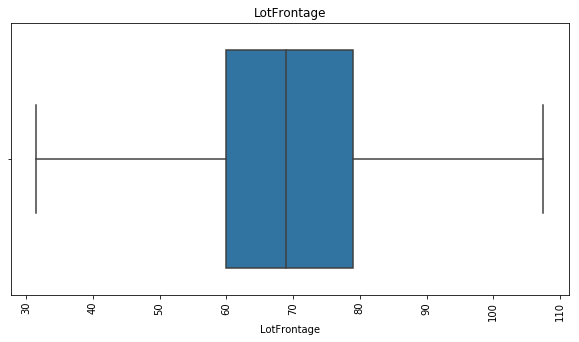

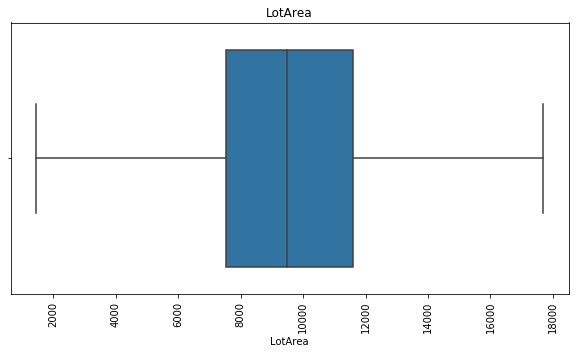

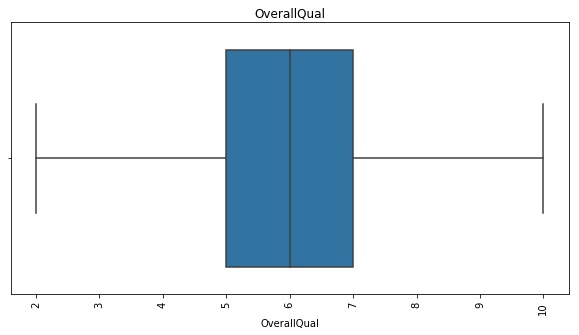

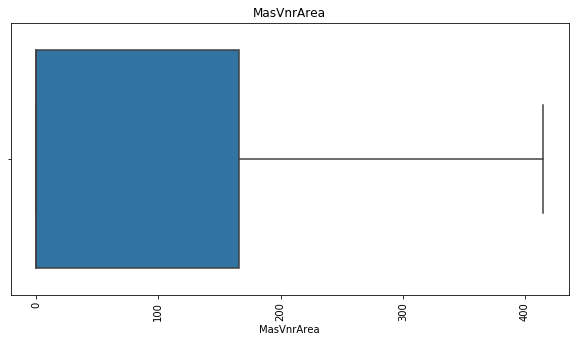

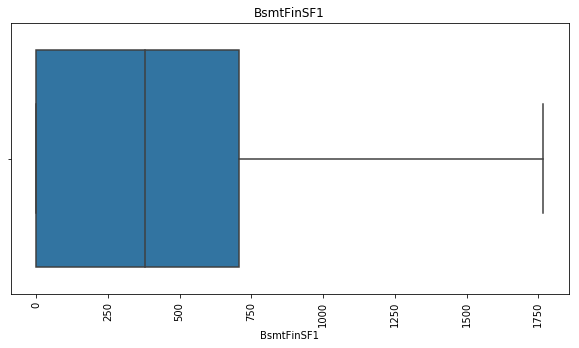

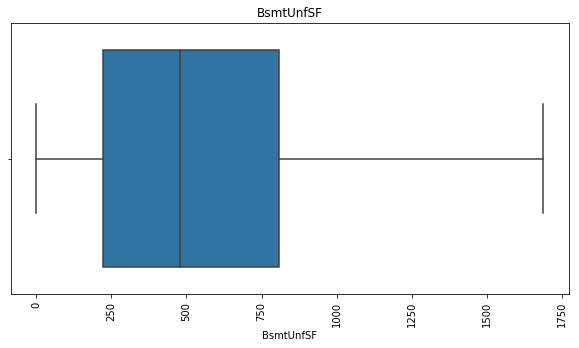

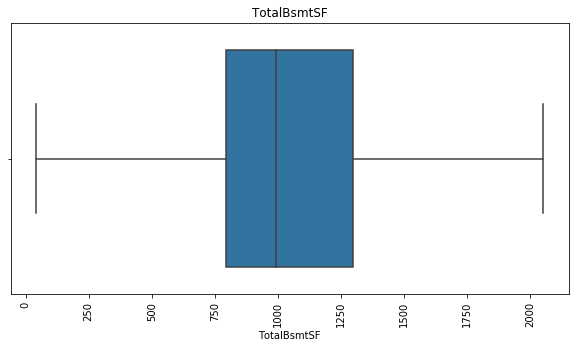

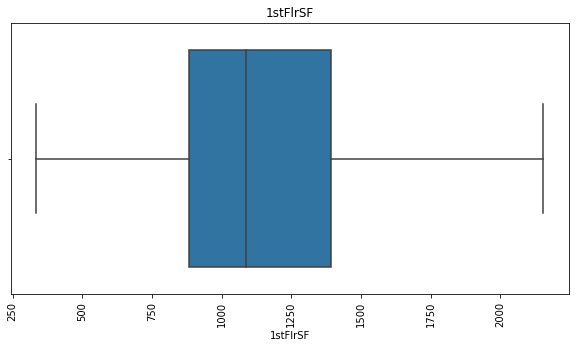

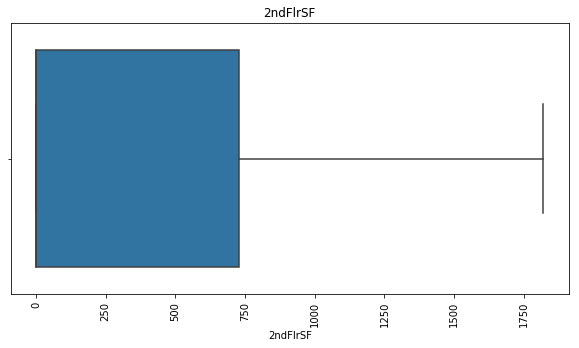

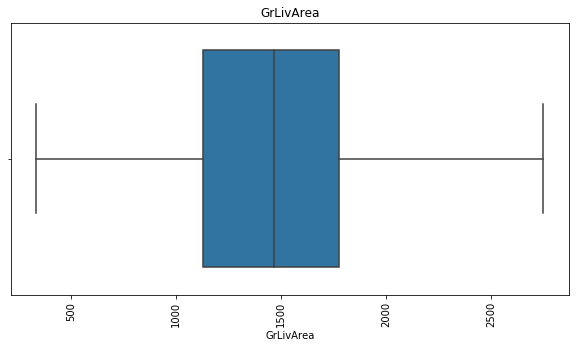

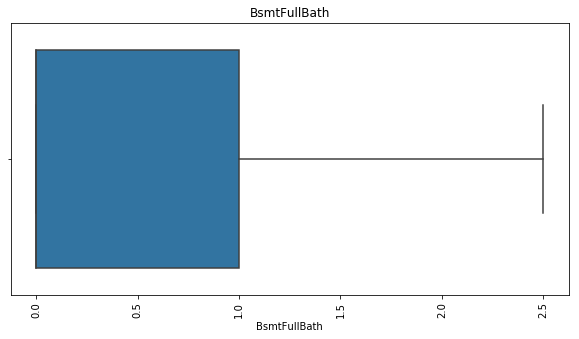

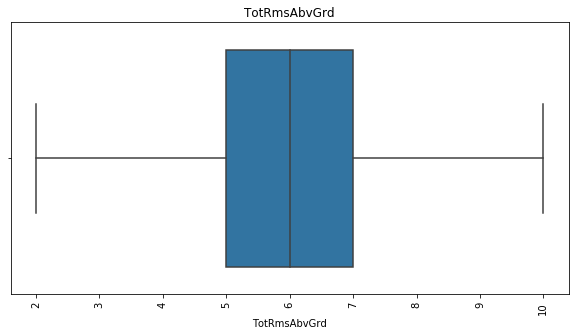

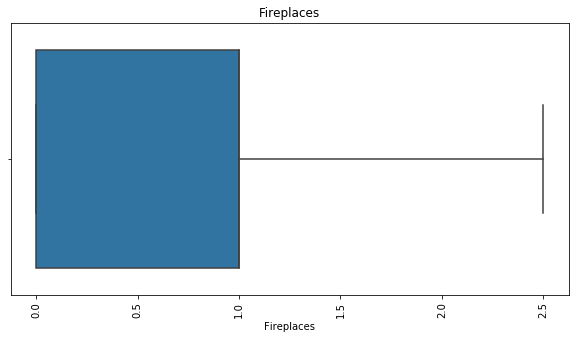

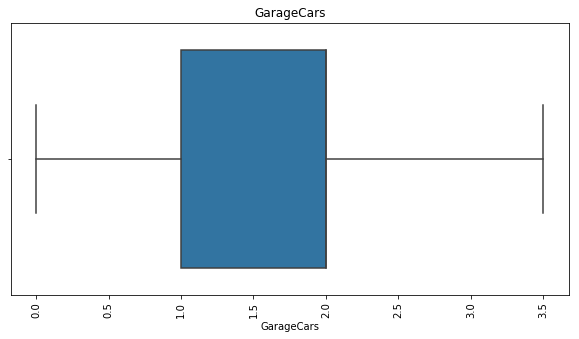

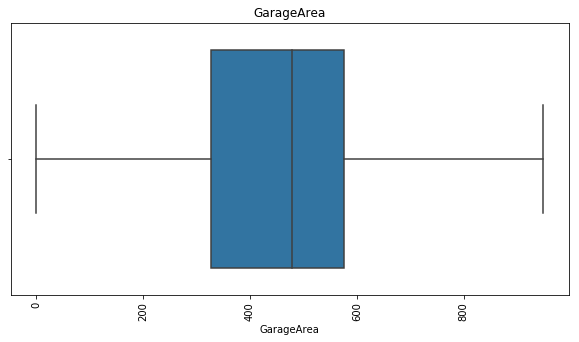

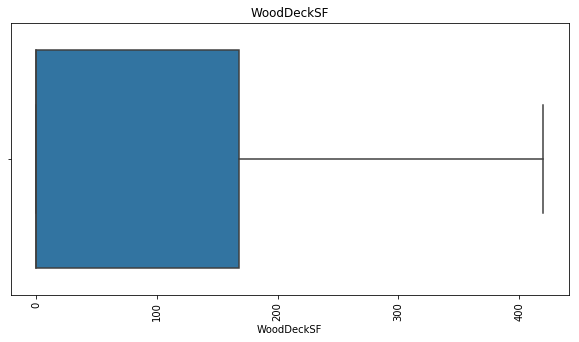

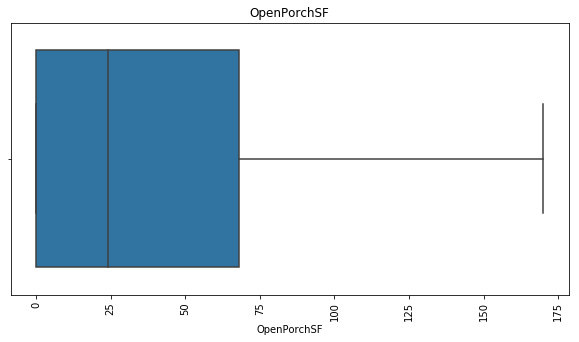

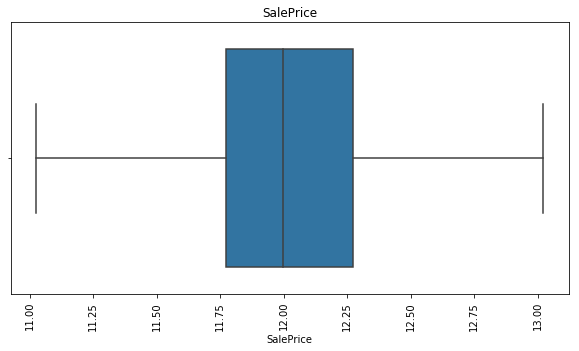

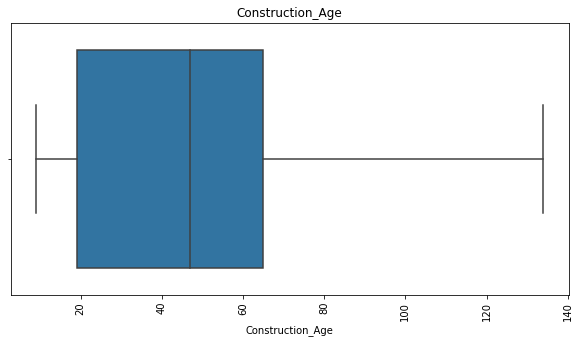

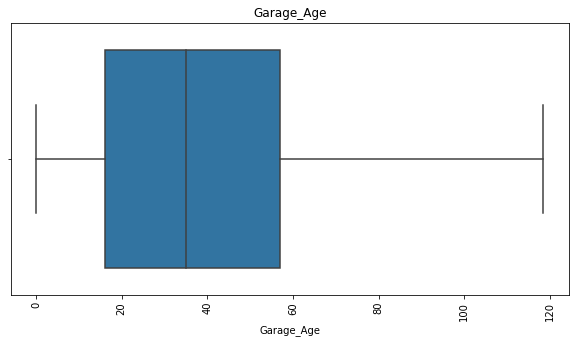

In [53]:
# Looping through each variable of housing with outliers

for i in out_vars:
    Q1 = housing[i].quantile(0.25)                         # taking the value of first quantile for each column
    Q3 = housing[i].quantile(0.75)                         # taking the value of third quantile for eah column

    IQR = Q3 - Q1                                          # finding the inter-quartile range

    lower_fence = Q1 - 1.5*IQR                             # calculating the lower fence
    upper_fence = Q3 + 1.5*IQR                             # calculating the upper fence

    # Replacing all the values lower than the lower fence with the value of lower fence
    housing[i][housing[i] <= lower_fence] = lower_fence 

    # Replacing all the values lower than the lower fence with the value of lower fence
    housing[i][housing[i] >= upper_fence] = upper_fence

    plt.figure(1, figsize=(10,5))                         # adjusting the image size
    sns.boxplot(housing[i])                               # creating a box plot for each individual column
    plt.xticks(rotation=90, fontsize=10)                  # rotating the x-axis labels 
    plt.title(i)                                          # setting the title of the plot       
    plt.show()                                            # displaying the plot

In [54]:
# Reviewing the first few rows of housing

housing.head()

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Construction_Age,Remodel_Age,Garage_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450.0,7,196.0,706.0,150,856.0,856.0,854,1710,1.0,2,1,8,0.0,2.0,548.0,0,61,12.247694,16,16,16.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,9600.0,6,0.0,978.0,284,1262.0,1262.0,0,1262,0.0,2,0,6,1.0,2.0,460.0,298,0,12.109011,43,43,43.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,68.0,11250.0,7,162.0,486.0,434,920.0,920.0,866,1786,1.0,2,1,6,1.0,2.0,608.0,0,42,12.317167,18,17,18.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60.0,9550.0,7,0.0,216.0,540,756.0,961.0,756,1717,1.0,1,0,7,1.0,3.0,642.0,0,35,11.849398,104,49,21.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260.0,8,350.0,655.0,490,1145.0,1145.0,1053,2198,1.0,2,1,9,1.0,3.0,836.0,192,84,12.429216,19,19,19.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
# Reviewing number of rows and columns in housing

housing.shape

(1451, 184)

### Splitting the Data into Train and Test Sets

In [56]:
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the features

In [57]:
# Creating a scaler object using StandardScaler()

scaler = StandardScaler()

In [58]:
# Applying scaler() to all the columns except the 'dummy' variables

scale_vars = num_vars.copy()

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

df_train.head()

C:\Users\shash\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\shash\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,Construction_Age,Remodel_Age,Garage_Age,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,...,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_N/A,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_N/A,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_N/A,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_N/A,GarageFinish_N/A,GarageFinish_RFn,GarageFinish_Unf,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
801,-1.674316,-1.336012,-1.552452,-0.667804,-0.528674,0.966420,0.362322,0.121480,-0.807809,-0.630829,1.123131,-1.036398,-0.783948,-0.941475,-0.960038,0.303257,-0.158069,-0.773598,-0.815105,-1.080908,1.881941,-0.238209,0.914346,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
569,0.000968,-0.711938,-0.824292,-0.667804,1.191884,-1.343572,-0.285265,-0.571553,-0.807809,-1.148763,1.123131,-1.036398,-0.783948,-1.581098,2.198597,0.303257,0.615858,-0.402486,-0.815105,-0.533465,-0.236100,0.301373,0.060225,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1181,-0.287874,-1.115965,1.360189,0.721480,2.430410,-1.066095,1.396414,1.370584,-0.807809,0.302681,1.123131,0.793070,-0.783948,-0.941475,0.619279,0.303257,0.045087,0.657834,0.190873,2.194040,-1.211071,-1.121161,-1.065663,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
808,0.925262,1.068574,-0.824292,2.431942,0.207061,-0.464896,-0.077934,-0.179839,-0.807809,-0.856018,1.123131,-1.036398,-0.783948,-0.301852,0.619279,0.303257,0.054761,-0.773598,-0.815105,-0.115401,0.200956,0.939061,0.564933,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1095,0.520883,-0.073046,-0.096131,-0.667804,-0.927678,1.639301,0.664359,0.444713,-0.807809,-0.389263,-0.794410,0.793070,-0.783948,-0.301852,0.619279,0.303257,-0.158069,-0.773598,-0.397529,0.136914,-1.143831,-1.023055,-0.988015,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0

### Dividing into `X` and `y` sets for the model building

In [59]:
# Creating X_train and y_train

X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

## Model Building
### Ridge Regression

In [60]:
# List of alphas to tune

params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

ridge = Ridge()


# Cross validation

folds = 5

ridge_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', 
                        cv = folds, return_train_score = True, verbose = 1)

ridge_cv.fit(X_train, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=1)]: Done 110 out of 110 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [61]:
ridge_cv_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha'] <= 200]
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007580,0.002645,0.001396,0.000489,0.1,{'alpha': 0.1},-0.245038,-0.225479,-0.246951,-0.223701,-0.231205,-0.234475,0.009746,22,-0.171313,-0.187093,-0.180127,-0.186010,-0.184828,-0.181874,0.005790
1,0.006982,0.000892,0.001795,0.000399,0.2,{'alpha': 0.2},-0.244635,-0.221444,-0.244954,-0.222863,-0.230744,-0.232928,0.010194,20,-0.172071,-0.187640,-0.180707,-0.186534,-0.185281,-0.182447,0.005699
2,0.007979,0.001093,0.001196,0.000398,0.3,{'alpha': 0.3},-0.244253,-0.218640,-0.243520,-0.222001,-0.230396,-0.231762,0.010617,19,-0.172774,-0.188364,-0.181271,-0.187055,-0.185693,-0.183031,0.005657
3,0.007580,0.000489,0.001396,0.000488,0.4,{'alpha': 0.4},-0.244051,-0.216989,-0.242518,-0.221163,-0.230108,-0.230965,0.010926,18,-0.173451,-0.188941,-0.181807,-0.187513,-0.186111,-0.183565,0.005592
4,0.007382,0.001016,0.001196,0.000399,0.5,{'alpha': 0.5},-0.243835,-0.215869,-0.241664,-0.220361,-0.229858,-0.230317,0.011131,17,-0.174062,-0.189458,-0.182344,-0.187957,-0.186456,-0.184055,0.005531


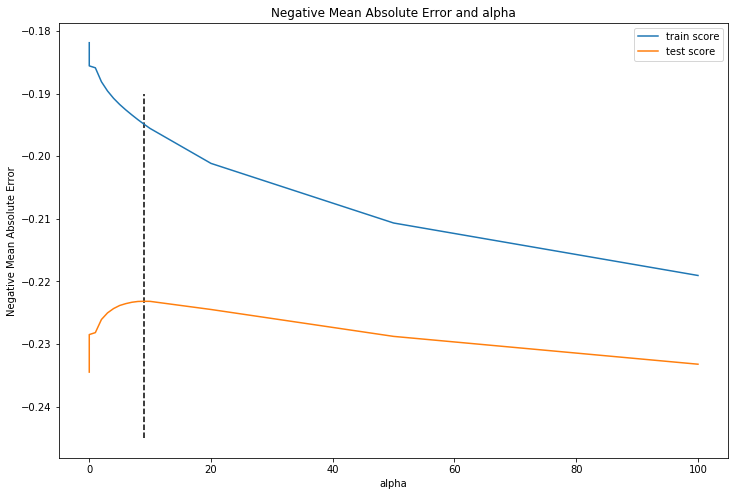

In [62]:
# Plotting mean test and train scores with alpha

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')

# Plotting
fig = plt.figure(figsize=[12,8])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.vlines(x=9, ymax=-0.19, ymin=-0.245, colors="k", linestyles="--")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [63]:
ridge_cv.best_params_

{'alpha': 9.0}

In [64]:
alpha = 9
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.60545445e-02,  5.88622573e-02,  2.01249672e-01,  3.55280714e-03,
        4.69619051e-02, -2.12549456e-02,  9.29886516e-02, -5.28176377e-03,
        4.10531584e-02,  2.92535865e-01,  2.26201081e-02,  1.28779397e-02,
        3.05957074e-02, -2.04243911e-03,  1.15337384e-02,  7.35404165e-02,
        2.92091754e-02,  3.15087119e-02,  2.40259870e-02, -3.57865881e-02,
       -1.02398228e-01, -1.33616930e-02,  1.55995762e-01,  9.72560538e-02,
        1.51011222e-01,  3.28236528e-02,  1.03288907e-01, -1.08276101e-01,
       -4.28699997e-03,  1.53295449e-01,  3.74908779e-02,  9.82549253e-02,
        7.61238813e-02, -4.03121710e-02, -4.91034794e-02, -1.69319548e-02,
        3.93749664e-02,  5.70173854e-02,  8.52195928e-03, -4.40257869e-02,
        1.57568191e-01,  1.84213183e-02, -1.21746509e-02,  2.49597738e-01,
       -1.68328404e-01, -1.69391491e-02, -1.56899061e-01, -1.72456845e-01,
       -1.01773873e-01, -5.41003210e-02,  2.30093473e-02, -4.42234998e-02,
        4.19529798e-02,  

### Lasso Regression

In [65]:
# List of alphas to tune

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1]}

lasso = Lasso(tol=0.1)

# Cross validation

lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', 
                        cv = folds, return_train_score = True, verbose = 1)

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [66]:
lasso_cv_results = pd.DataFrame(lasso_cv.cv_results_)
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007579,0.001354,0.001796,0.000747,1e-05,{'alpha': 1e-05},-0.297147,-0.244339,-0.269511,-0.282089,-0.273810,-0.273379,0.017316,5,-0.222962,-0.222439,-0.229528,-0.220662,-0.213621,-0.221842,0.005092
1,0.007379,0.000490,0.001795,0.000400,0.0001,{'alpha': 0.0001},-0.293306,-0.240270,-0.266601,-0.278507,-0.261974,-0.268131,0.017652,4,-0.223169,-0.222526,-0.229145,-0.220495,-0.210084,-0.221084,0.006209
2,0.019965,0.022986,0.001197,0.000977,0.001,{'alpha': 0.001},-0.254887,-0.216481,-0.234895,-0.233735,-0.234550,-0.234910,0.012167,1,-0.203314,-0.204442,-0.202056,-0.207016,-0.203195,-0.204005,0.001684
3,0.007181,0.001163,0.001795,0.000399,0.01,{'alpha': 0.01},-0.266451,-0.218756,-0.234655,-0.237042,-0.262348,-0.243850,0.017964,2,-0.226644,-0.243593,-0.234704,-0.234317,-0.231186,-0.234089,0.005561
4,0.005984,0.000631,0.001196,0.000399,0.05,{'alpha': 0.05},-0.282975,-0.227862,-0.245555,-0.259654,-0.272812,-0.257772,0.019539,3,-0.240026,-0.262555,-0.254729,-0.255891,-0.248435,-0.252327,0.007610


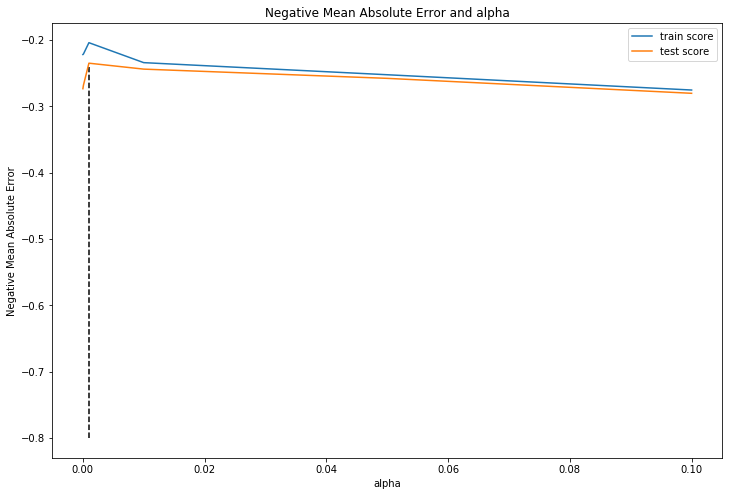

In [67]:
# Plotting mean test and train scores with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')

# Plotting
fig = plt.figure(figsize=[12,8])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.vlines(x=0.001, ymax=-0.24, ymin=-0.8, colors="k", linestyles="--")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [68]:
lasso_cv.best_params_

{'alpha': 0.001}

In [69]:
alpha = 0.001
lasso = Lasso(alpha=alpha, tol=0.1)
        
lasso.fit(X_train, y_train)
lasso.coef_

array([-9.35274315e-03,  4.11953553e-02,  2.09206270e-01,  4.56829168e-02,
        9.75348947e-02,  7.06080690e-03,  1.08831718e-01,  1.11450659e-01,
        2.35878219e-01,  1.50244477e-01,  2.43041876e-02,  1.21079583e-02,
        2.59770872e-02, -3.64944710e-03,  4.78994581e-02,  1.20318437e-01,
        1.04571545e-02,  3.77946350e-02,  2.91635217e-02, -1.00770555e-01,
       -1.22012951e-01, -5.52317470e-03,  1.90031625e-01,  1.22235001e-02,
        1.70043302e-01,  2.08621011e-04,  1.05445621e-01, -1.32632325e-01,
       -1.47182807e-04,  1.71131961e-01,  2.39070556e-02,  6.82671278e-02,
        7.66491661e-02, -0.00000000e+00, -0.00000000e+00, -3.12456982e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.41802370e-01,  0.00000000e+00,  0.00000000e+00,  3.33598272e-01,
       -1.48166589e-01,  0.00000000e+00, -6.82128228e-02, -1.66581479e-01,
       -1.24278331e-01, -2.34869933e-02, -0.00000000e+00, -2.44364910e-02,
        0.00000000e+00,  

## Residual Analysis of the `train` data

<font color = purple> Checking if the error terms are also normally distributed (one of the assumptions of linear regression) </font><br>
### `Ridge`

In [70]:
y_train_pred_ridge = ridge.predict(X_train)

Text(0.5, 0, 'Errors')

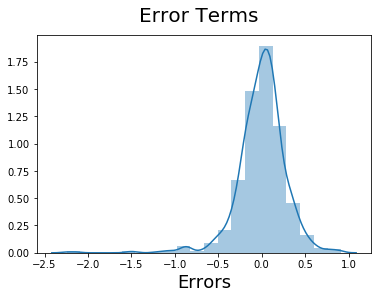

In [71]:
# Plotting the histogram of the error terms to see what it looks like

fig = plt.figure()
sns.distplot((y_train - y_train_pred_ridge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### `Lasso`

In [72]:
y_train_pred_lasso = lasso.predict(X_train)

Text(0.5, 0, 'Errors')

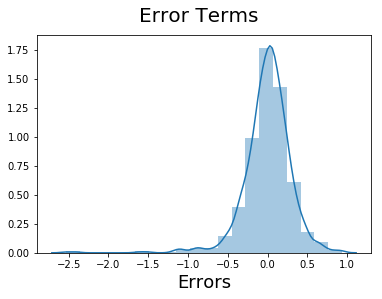

In [73]:
# Plotting the histogram of the error terms to see what it looks like

fig = plt.figure()
sns.distplot((y_train - y_train_pred_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## `R-squared score` on the `train` data

### `Ridge`

In [74]:
r2_score(y_train, y_train_pred_ridge)

0.9200738761406506

### `Lasso`

In [75]:
r2_score(y_train, y_train_pred_lasso)

0.911651136934487

## Making Predictions

In [76]:
# Applying the scaling on the test sets

df_test[scale_vars] = scaler.transform(df_test[scale_vars])

C:\Users\shash\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [77]:
# Dividing into X_test and y_test

X_test = df_test.drop('SalePrice', axis=1)
y_test = df_test['SalePrice']

In [78]:
# Using my model to make predictions

y_test_pred_ridge = ridge.predict(X_test)
y_test_pred_lasso = lasso.predict(X_test)

## Model Evaluation

### `Ridge`

Text(0, 0.5, 'y_test_pred_ridge')

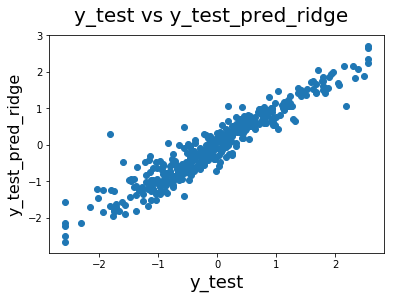

In [79]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_ridge)
fig.suptitle('y_test vs y_test_pred_ridge', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                                     # X-label
plt.ylabel('y_test_pred_ridge', fontsize=16)                          # Y-label

### `Lasso`

Text(0, 0.5, 'y_test_pred_lasso')

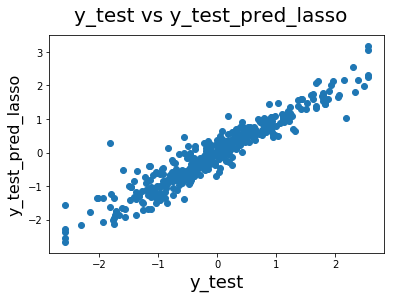

In [80]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred_lasso)
fig.suptitle('y_test vs y_test_pred_lasso', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                                     # X-label
plt.ylabel('y_test_pred_lasso', fontsize=16)                          # Y-label

## `R-squared score` on the `test` data

### `Ridge`

In [81]:
r2_score(y_test, y_test_pred_ridge)

0.9069338271368643

### `Lasso`

In [82]:
r2_score(y_test, y_test_pred_lasso)

0.9014486878825193

### `Ridge` model parameters

In [83]:
ridge_model_parameters = list(ridge.coef_)
ridge_model_parameters.insert(0, ridge.intercept_)
ridge_model_parameters = [round(x, 3) for x in ridge_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [84]:
# Listing the variables along with their respective coefficient values 
# in (descending) order of their impact on the target variable (SalePrice) 

sorted(list(zip(cols, ridge_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1]))

[('constant', -0.327),
 ('GrLivArea', 0.293),
 ('Neighborhood_Crawfor', 0.25),
 ('Exterior1st_BrkFace', 0.209),
 ('OverallQual', 0.201),
 ('MSSubClass_30', -0.196),
 ('Neighborhood_MeadowV', -0.172),
 ('Neighborhood_Edwards', -0.168),
 ('Neighborhood_StoneBr', 0.166),
 ('HeatingQC_Fa', -0.166),
 ('Neighborhood_BrkSide', 0.158),
 ('Neighborhood_IDOTRR', -0.157),
 ('MSZoning_FV', 0.156),
 ('LandContour_HLS', 0.153),
 ('MSZoning_RL', 0.151),
 ('Neighborhood_NridgHt', 0.15),
 ('Condition1_Norm', 0.145),
 ('MSSubClass_160', -0.142),
 ('ExterCond_Fa', -0.132),
 ('Exterior1st_BrkComm', -0.122),
 ('Neighborhood_Somerst', 0.118),
 ('LotShape_IR3', -0.108),
 ('LotShape_IR2', 0.103),
 ('Remodel_Age', -0.102),
 ('Neighborhood_Mitchel', -0.102),
 ('Exterior2nd_Stucco', -0.099),
 ('LandContour_Lvl', 0.098),
 ('GarageType_Attchd', 0.098),
 ('MSZoning_RH', 0.097),
 ('BsmtFinType1_Unf', -0.095),
 ('KitchenQual_TA', -0.095),
 ('TotalBsmtSF', 0.093),
 ('FireplaceQu_Po', -0.093),
 ('GarageType_CarPort', -

### `Lasso` model parameters

In [85]:
lasso_model_parameters = list(lasso.coef_)
lasso_model_parameters.insert(0, lasso.intercept_)
lasso_model_parameters = [round(x, 3) for x in lasso_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")

In [86]:
# Listing the variables along with their respective coefficient values 
# in (descending) order of their impact on the target variable (SalePrice) 

sorted(list(zip(cols, lasso_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1]))

[('constant', -0.505),
 ('Neighborhood_Crawfor', 0.334),
 ('Exterior1st_BrkComm', -0.288),
 ('Neighborhood_BrkSide', 0.242),
 ('2ndFlrSF', 0.236),
 ('Exterior1st_BrkFace', 0.216),
 ('OverallQual', 0.209),
 ('MSZoning_FV', 0.19),
 ('Neighborhood_NridgHt', 0.19),
 ('MSSubClass_30', -0.184),
 ('LandContour_HLS', 0.171),
 ('MSZoning_RL', 0.17),
 ('MSSubClass_160', -0.17),
 ('Neighborhood_MeadowV', -0.167),
 ('Neighborhood_StoneBr', 0.156),
 ('GrLivArea', 0.15),
 ('Neighborhood_Edwards', -0.148),
 ('Condition1_Norm', 0.146),
 ('ExterCond_Fa', -0.136),
 ('LotShape_IR3', -0.133),
 ('Neighborhood_Mitchel', -0.124),
 ('Remodel_Age', -0.122),
 ('GarageCars', 0.12),
 ('Neighborhood_Somerst', 0.117),
 ('MasVnrType_None', 0.114),
 ('HeatingQC_Fa', -0.112),
 ('1stFlrSF', 0.111),
 ('Exterior2nd_Stucco', -0.111),
 ('TotalBsmtSF', 0.109),
 ('HouseStyle_SLvl', 0.108),
 ('LotShape_IR2', 0.105),
 ('Construction_Age', -0.101),
 ('BsmtFinSF1', 0.098),
 ('HouseStyle_2Story', -0.092),
 ('HouseStyle_1Story', 0

In [87]:
# Creating a list of five most important predictor variables (excluding dummies and derived variables) for later use

top_five = [i[0] for i in sorted(list(zip(cols, lasso_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1])) 
            if '_' not in i[0] and i[0] != 'constant'][:5]
top_five

['2ndFlrSF', 'OverallQual', 'GrLivArea', 'GarageCars', '1stFlrSF']

## `Q1`: Double the value of alpha
### `Ridge`

In [88]:
alpha = 18
ridge_2 = Ridge(alpha=alpha)
ridge_2.fit(X_train, y_train)
ridge_2.coef_

array([ 0.01728584,  0.06002235,  0.20841586,  0.00693722,  0.05185533,
       -0.01940822,  0.09634958,  0.02300542,  0.05881859,  0.25107809,
        0.02292164,  0.01301738,  0.03122156,  0.00355819,  0.01623718,
        0.07358835,  0.0312981 ,  0.03146155,  0.02419066, -0.03726939,
       -0.10615422, -0.00950019,  0.10658943,  0.04926342,  0.10835115,
       -0.02184678,  0.07968301, -0.08089559, -0.00924906,  0.11443092,
        0.0189135 ,  0.06825645,  0.06806978, -0.02824267, -0.0251644 ,
       -0.01546817,  0.03697205,  0.03893211,  0.00529519, -0.02762143,
        0.13396022,  0.0202916 , -0.01186979,  0.20187269, -0.15022375,
       -0.01799013, -0.12321146, -0.11143855, -0.07500528, -0.03639656,
        0.01055603, -0.03157015,  0.0243396 ,  0.11561469, -0.05523713,
        0.00035213, -0.04327831, -0.04304903,  0.09516727,  0.11579553,
       -0.01701167,  0.06149878, -0.01825431,  0.1346117 ,  0.00758651,
       -0.01527246, -0.04181122,  0.00702098,  0.00324328,  0.01

In [89]:
# R-squared score on the train data

y_train_pred_ridge_2 = ridge_2.predict(X_train)
r2_score(y_train, y_train_pred_ridge_2)

0.9157983731026255

In [90]:
# R-squared score on the test data

y_test_pred_ridge_2 = ridge_2.predict(X_test)
r2_score(y_test, y_test_pred_ridge_2)

0.9069343006979906

In [91]:
# Model parameters

ridge_2_model_parameters = list(ridge_2.coef_)
ridge_2_model_parameters.insert(0, ridge_2.intercept_)
ridge_2_model_parameters = [round(x, 3) for x in ridge_2_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, ridge_2_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1]))

[('GrLivArea', 0.251),
 ('constant', -0.224),
 ('OverallQual', 0.208),
 ('Neighborhood_Crawfor', 0.202),
 ('Exterior1st_BrkFace', 0.163),
 ('MSSubClass_30', -0.163),
 ('Neighborhood_Edwards', -0.15),
 ('Condition1_Norm', 0.135),
 ('Neighborhood_BrkSide', 0.134),
 ('HeatingQC_Fa', -0.133),
 ('Neighborhood_IDOTRR', -0.123),
 ('Neighborhood_NridgHt', 0.116),
 ('Neighborhood_StoneBr', 0.116),
 ('LandContour_HLS', 0.114),
 ('Neighborhood_MeadowV', -0.111),
 ('MSZoning_RL', 0.108),
 ('MSSubClass_160', -0.108),
 ('MSZoning_FV', 0.107),
 ('Remodel_Age', -0.106),
 ('TotalBsmtSF', 0.096),
 ('ExterCond_Fa', -0.096),
 ('Neighborhood_Somerst', 0.095),
 ('BsmtFinType1_Unf', -0.082),
 ('LotShape_IR3', -0.081),
 ('LotShape_IR2', 0.08),
 ('GarageType_Attchd', 0.078),
 ('Exterior2nd_Stucco', -0.077),
 ('KitchenQual_TA', -0.077),
 ('Neighborhood_Mitchel', -0.075),
 ('GarageCars', 0.074),
 ('Exterior1st_Wd Sdng', -0.073),
 ('FireplaceQu_Gd', 0.073),
 ('Exterior1st_BrkComm', -0.072),
 ('LandContour_Lvl', 0

In [92]:
# Five most important predictor variables (excluding dummies and derived variables)

[i[0] for i in sorted(list(zip(cols, ridge_2_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1])) 
 if '_' not in i[0] and i[0]!='constant'][:5]

['GrLivArea', 'OverallQual', 'TotalBsmtSF', 'GarageCars', 'LotArea']

### `Lasso`

In [93]:
alpha = 0.002
lasso_2 = Lasso(alpha=alpha, tol=0.1)
        
lasso_2.fit(X_train, y_train)
lasso_2.coef_

array([-0.01354183,  0.0496103 ,  0.23424585,  0.05579935,  0.10325108,
        0.01165065,  0.10942576,  0.11849013,  0.22042941,  0.13534466,
        0.02290048,  0.01179655,  0.02570352, -0.        ,  0.04366795,
        0.1244273 ,  0.00838446,  0.03765821,  0.02667538, -0.09242885,
       -0.12457968, -0.        ,  0.14565191,  0.        ,  0.17274951,
       -0.        ,  0.05477952, -0.06678188, -0.0008124 ,  0.10062306,
        0.        ,  0.02340383,  0.05877988, -0.        , -0.        ,
       -0.00232833,  0.        ,  0.        ,  0.        , -0.        ,
        0.21471959,  0.        ,  0.        ,  0.29417457, -0.12968049,
       -0.        , -0.02097435, -0.05784463, -0.07423553, -0.        ,
       -0.        , -0.00206096, -0.        ,  0.12211273, -0.        ,
        0.        , -0.        , -0.00392388,  0.11228432,  0.05835895,
       -0.        ,  0.        , -0.        ,  0.15365124,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.  

In [94]:
# R-squared score on the train data

y_train_pred_lasso_2 = lasso_2.predict(X_train)
r2_score(y_train, y_train_pred_lasso_2)

0.9049155621804865

In [95]:
# R-squared score on the test data

y_test_pred_lasso_2 = lasso_2.predict(X_test)
r2_score(y_test, y_test_pred_lasso_2)

0.9007000494604163

In [96]:
# Model parameters

lasso_2_model_parameters = list(lasso_2.coef_)
lasso_2_model_parameters.insert(0, lasso_2.intercept_)
lasso_2_model_parameters = [round(x, 3) for x in lasso_2_model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, lasso_2_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1]))

[('constant', -0.432),
 ('Neighborhood_Crawfor', 0.294),
 ('OverallQual', 0.234),
 ('2ndFlrSF', 0.22),
 ('Neighborhood_BrkSide', 0.215),
 ('Exterior1st_BrkFace', 0.19),
 ('MSZoning_RL', 0.173),
 ('MSSubClass_30', -0.155),
 ('Condition1_Norm', 0.154),
 ('MSSubClass_160', -0.154),
 ('MSZoning_FV', 0.146),
 ('GrLivArea', 0.135),
 ('Neighborhood_Edwards', -0.13),
 ('Remodel_Age', -0.125),
 ('GarageCars', 0.124),
 ('Neighborhood_NridgHt', 0.122),
 ('1stFlrSF', 0.118),
 ('MasVnrType_None', 0.118),
 ('Neighborhood_Somerst', 0.112),
 ('TotalBsmtSF', 0.109),
 ('BsmtFinSF1', 0.103),
 ('LandContour_HLS', 0.101),
 ('ExterCond_Fa', -0.1),
 ('HouseStyle_2Story', -0.097),
 ('Construction_Age', -0.092),
 ('BldgType_Duplex', -0.091),
 ('HeatingQC_Fa', -0.083),
 ('Neighborhood_Mitchel', -0.074),
 ('LotShape_IR3', -0.067),
 ('LotConfig_CulDSac', 0.059),
 ('Neighborhood_MeadowV', -0.058),
 ('Neighborhood_StoneBr', 0.058),
 ('Exterior2nd_Stucco', -0.057),
 ('MasVnrArea', 0.056),
 ('HouseStyle_SLvl', 0.056)

In [97]:
# Five most important predictor variables (excluding dummies and derived variables)

[i[0] for i in sorted(list(zip(cols, lasso_2_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1])) 
 if '_' not in i[0] and i[0]!='constant'][:5]

['OverallQual', '2ndFlrSF', 'GrLivArea', 'GarageCars', '1stFlrSF']

## `Q3`: New `Lasso` model
### (excluding the five most important predictor variables from the original model)

In [98]:
# Dropping aforementioned variables from X_train and X_test

X_train_new = X_train.drop(top_five, axis=1)
X_test_new = X_test.drop(top_five, axis=1)

In [99]:
# List of alphas to tune

params = {'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.05, 0.1]}

new_lasso = Lasso(tol=0.1)

# Cross validation

new_lasso_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', 
                            cv = folds, return_train_score = True, verbose = 1)

new_lasso_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [100]:
new_lasso_cv_results = pd.DataFrame(new_lasso_cv.cv_results_)
new_lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007379,0.000797,0.001595,0.000488,1e-05,{'alpha': 1e-05},-0.318135,-0.300366,-0.293561,-0.300894,-0.322891,-0.307169,0.011298,4,-0.236431,-0.246581,-0.245720,-0.247621,-0.253301,-0.245931,0.005439
1,0.006783,0.001324,0.001396,0.000488,0.0001,{'alpha': 0.0001},-0.316516,-0.297896,-0.291787,-0.297581,-0.306499,-0.302056,0.008621,3,-0.237276,-0.247081,-0.246420,-0.248062,-0.245508,-0.244869,0.003887
2,0.007779,0.000745,0.001197,0.000399,0.001,{'alpha': 0.001},-0.293496,-0.272487,-0.264082,-0.255840,-0.272180,-0.271617,0.012534,1,-0.233060,-0.232572,-0.236009,-0.234882,-0.230199,-0.233344,0.002002
3,0.006982,0.000893,0.001595,0.000489,0.01,{'alpha': 0.01},-0.298623,-0.282330,-0.274870,-0.258398,-0.312845,-0.285413,0.018855,2,-0.270542,-0.280165,-0.275843,-0.275037,-0.267483,-0.273814,0.004399
4,0.005786,0.000746,0.001395,0.000489,0.05,{'alpha': 0.05},-0.334476,-0.310842,-0.301660,-0.296529,-0.335136,-0.315729,0.016239,5,-0.303954,-0.311408,-0.312395,-0.318334,-0.305285,-0.310275,0.005207


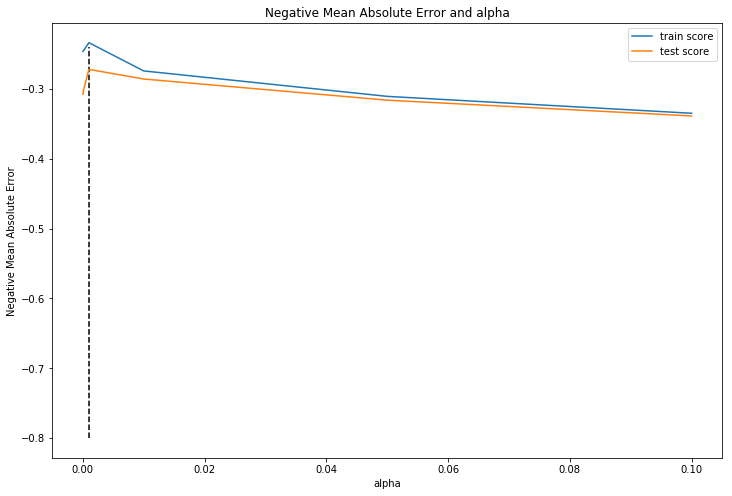

In [101]:
# Plotting mean test and train scores with alpha 
new_lasso_cv_results['param_alpha'] = new_lasso_cv_results['param_alpha'].astype('float32')

# Plotting
fig = plt.figure(figsize=[12,8])
plt.plot(new_lasso_cv_results['param_alpha'], new_lasso_cv_results['mean_train_score'])
plt.plot(new_lasso_cv_results['param_alpha'], new_lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.vlines(x=0.001, ymax=-0.24, ymin=-0.8, colors="k", linestyles="--")
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [102]:
lasso_cv.best_params_

{'alpha': 0.001}

In [103]:
alpha = 0.001
new_lasso = Lasso(alpha=alpha, tol=0.1)
        
new_lasso.fit(X_train_new, y_train)
new_lasso.coef_

array([ 0.0054756 ,  0.04565206,  0.02921525,  0.11512739,  0.02206433,
        0.17075912,  0.00744131,  0.1039735 ,  0.09424892,  0.14813794,
        0.13486265,  0.15089512,  0.045044  ,  0.04316984, -0.14451989,
       -0.13665923,  0.00376662,  0.12866106,  0.05700082,  0.13940142,
        0.03665096,  0.13805285, -0.14344407, -0.        ,  0.24705095,
        0.01696774,  0.05959007,  0.0824807 , -0.03450133, -0.        ,
       -0.01385529,  0.        ,  0.        ,  0.        , -0.02329404,
        0.20197436,  0.        ,  0.        ,  0.41669143, -0.188207  ,
       -0.016005  , -0.20856521, -0.37205053, -0.12416438, -0.01375348,
        0.        , -0.00112054,  0.22178557,  0.25606726, -0.01091794,
        0.01411342, -0.04972304, -0.        ,  0.14186391,  0.42258058,
        0.        ,  0.11987208, -0.04845168,  0.10116583,  0.        ,
       -0.        , -0.0973619 ,  0.        , -0.        ,  0.        ,
       -0.00785352, -0.2483829 , -0.07338724, -0.00527257,  0.  

In [104]:
# R-squared score on the train data

y_train_pred_lasso_new = new_lasso.predict(X_train_new)
r2_score(y_train, y_train_pred_lasso_new)

0.8934038023253177

In [105]:
# R-squared score on the test data

y_test_pred_lasso_new = new_lasso.predict(X_test_new)
r2_score(y_test, y_test_pred_lasso_new)

0.8850258182607603

In [106]:
# Model parameters

new_lasso_model_parameters = list(new_lasso.coef_)
new_lasso_model_parameters.insert(0, new_lasso.intercept_)
new_lasso_model_parameters = [round(x, 3) for x in new_lasso_model_parameters]
cols = X_train_new.columns
cols = cols.insert(0, "constant")
sorted(list(zip(cols, new_lasso_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1]))

[('Neighborhood_StoneBr', 0.423),
 ('Neighborhood_Crawfor', 0.417),
 ('Neighborhood_MeadowV', -0.372),
 ('Exterior1st_BrkFace', 0.283),
 ('MSSubClass_75', 0.259),
 ('Neighborhood_NridgHt', 0.256),
 ('BldgType_Duplex', -0.248),
 ('LandContour_HLS', 0.247),
 ('Neighborhood_NoRidge', 0.222),
 ('MSSubClass_70', 0.218),
 ('Neighborhood_IDOTRR', -0.209),
 ('FireplaceQu_Po', -0.207),
 ('Neighborhood_BrkSide', 0.202),
 ('Neighborhood_Edwards', -0.188),
 ('Exterior1st_BrkComm', -0.182),
 ('MSSubClass_30', -0.179),
 ('TotalBsmtSF', 0.171),
 ('constant', -0.167),
 ('HouseStyle_1Story', -0.154),
 ('GarageArea', 0.151),
 ('TotRmsAbvGrd', 0.148),
 ('Construction_Age', -0.145),
 ('LotShape_IR3', -0.143),
 ('Neighborhood_Somerst', 0.142),
 ('MSSubClass_160', -0.142),
 ('HeatingQC_Fa', -0.14),
 ('MSZoning_RL', 0.139),
 ('LotShape_IR2', 0.138),
 ('Remodel_Age', -0.137),
 ('Fireplaces', 0.135),
 ('MSZoning_FV', 0.129),
 ('FireplaceQu_Fa', -0.129),
 ('Neighborhood_Mitchel', -0.124),
 ('Neighborhood_Veenke

In [107]:
# Five most important predictor variables (excluding dummies and derived variables) in the new lasso model

[i[0] for i in sorted(list(zip(cols, new_lasso_model_parameters)), reverse=True, key= lambda x: np.absolute(x[1])) 
 if '_' not in i[0] and i[0]!='constant'][:5]

['TotalBsmtSF', 'GarageArea', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1']

# End of Advanced Regression Assignment